Wir benuzten k-means Algorithmus, um den gegebende Datensatz 2d-em.csv in den Klassen (mit beliebiege Anzahl als Parameter) zuzuordnen.

In [31]:
import math
import numpy as np
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def file_get_contents(filename):
    return np.genfromtxt(filename, delimiter=',')

get the data ready.

In [32]:
data_original = file_get_contents('resources/2d-em.csv')

Fügen wir hier eine zusätzliche 1. Spalte hinzu, um später klar zu machen, welche Sample zu welcher Clustermenge gehören.

In [33]:
def confuguration(data):

    length = len(data)
    column = np.zeros((length, 1))
    return np.concatenate((column, data), 1)

data = confuguration(data_original)

Mit k-Means Algorithmus werden am Anfang ein Paar (k) zufällige Mittelpunkte initialisiert, hier erzeugen wir die Indexe von k vielen zufälligen Mittelpunkten.

In [34]:
def get_inizial(data, k):
    length = len(data)
    middle = np.random.randint(length, size=k)
    return middle

Ordne die Klassen zu, und fügen wir das Ergebnis an jeden ersten Stlle, Distance bei jede Data wird mit K
vielen Mittlepunkt berechnet und davon wählen wir die kleinste, lasse die data zu der Klasse gehören.

In [35]:
def distance(array1, array2):
    dist = 0

    for i in range(1, len(array1)):
        dist += math.pow((array1[i] - array2[i]), 2)
    else:
        dist = math.sqrt(dist)
    return dist

def clustering(data, k, middle):
    for i in range(0, len(data)):
        tmp = []
        for j in range(0, k):
            dis = distance(middle[j], data[i])
            tmp.append(dis)
        smallIndex = np.argmin(tmp)
        data[i][0] = smallIndex
    return data

Teile die data in K vielen Teilmenge nach die Klasse, zu welche die gehören.

In [36]:
def get_seperate_classes(data, k):
    classes = []
    for i in range(0, k):
        tmp = []
        for j in range(0, len(data)):
            if (data[j][0] == i):
                tmp.append(data[j])
        classes.append(tmp)
    return classes

def check_cluster(cluster1, cluster2):
    return np.array_equal(cluster1, cluster2)

def diameter(images):   # hier wird die Mittelvektor vom Matrix berechnet
    result = np.zeros((len(images[0])), dtype=np.float)

    for pixel in range(0, len(images[0])): # kriegen an jedem Index von allen Sample die durchschnittliche                     Werte.
        sum = 0

        for image in range(0, len(images)):
            sum += images[image][pixel]

        result[pixel] = (sum / len(images))

    return result

Jetzt führen wir k-means Algorithmus durch, und ploten die, um zu schauen was ist passiert.

In [37]:
def ploting(data, colour):
    x = []
    y = []
    x1 = get_ellipse(mycovariance(np.delete(data, (0), axis=1)))[0]
    y1 = get_ellipse(mycovariance(np.delete(data, (0), axis=1)))[1]
    for i in range(0, len(data)):
        x.append(data[i][1])
        y.append(data[i][2])
    plt.scatter(x, y, 0.1, color=colour)
    plt.plot(x1, y1, colour) # ploten die Ellipse
    
    
def mycovariance(matrix):   # berechne die Kovarianzmatrix von unserer Trainingklasse
    middlevec = diameter(matrix)
    length = len(matrix)
    matrix1 = np.transpose(np.subtract(matrix, middlevec))
    matrix2 = np.transpose(matrix1)
    matrix = np.dot(matrix1, matrix2)
    return np.divide(matrix, length-1)


def get_ellipse(cov):
    num_points = 1000
    radius = 1
    arcs = np.linspace(0, 2 * pi, num_points)
    x = radius * sin(arcs)
    y = radius * cos(arcs)
    xy = np.array(list(zip(x, y)))
    x, y = zip(*xy.dot(cov))
    return x, y


def my_kmeans(data, k):
    inizialCluster = get_inizial(data, k)
    middle = []
    mydata = clustering(data, k, data[inizialCluster])

    ploting(mydata, 'black')
    plt.title('original data')
    plt.show()

    for i in range(0, k):  # iniziale Mittelpunkte
        middle.append(data[inizialCluster[i]])

    while True:
        kClasses = get_seperate_classes(mydata, k)
        ploting(kClasses[0], 'b')
        ploting(kClasses[1], 'r')
        ploting(kClasses[2], 'g')
        plt.title('3-cluster')
        plt.show()
        
        middle_new = []
        for i in range(0, len(kClasses)):  # neue berechnete Mittelpunkte
            middle_new.append(diameter(kClasses[i]))

        if np.array_equal(middle, middle_new):
            ploting(kClasses[0], 'b')
            ploting(kClasses[1], 'r')
            ploting(kClasses[2], 'g')
            plt.title('3-cluster final')
            plt.show()
            break

        else:
            middle = middle_new
            mydata = clustering(mydata, k, middle)

    return mydata, middle

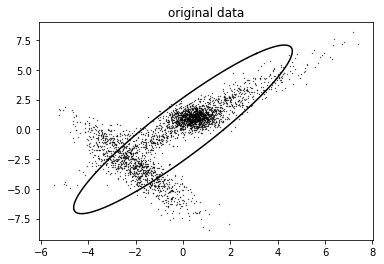

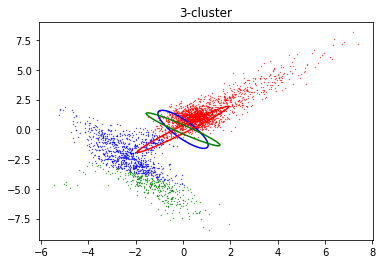

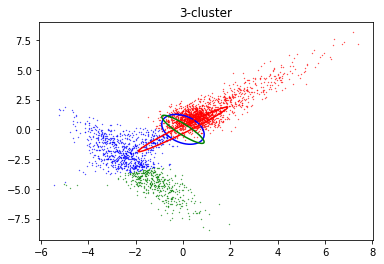

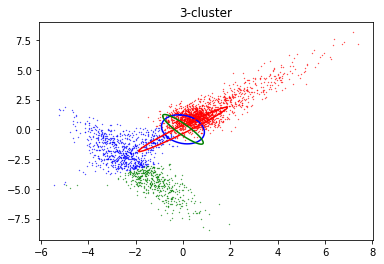

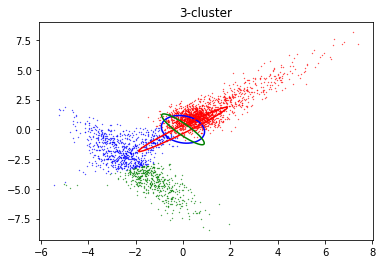

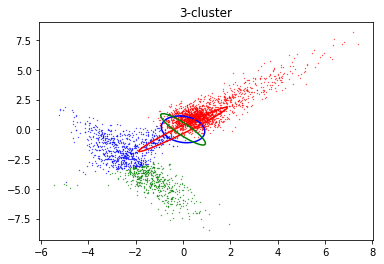

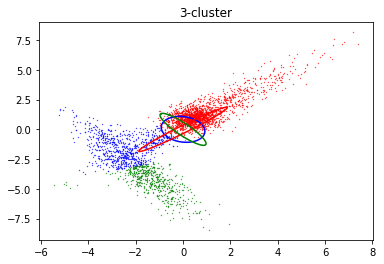

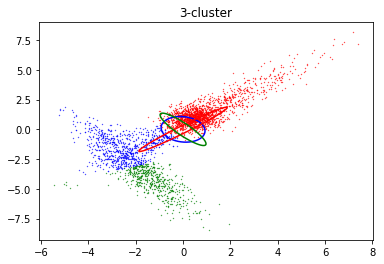

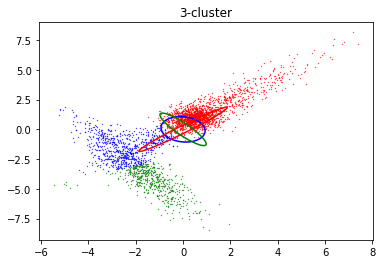

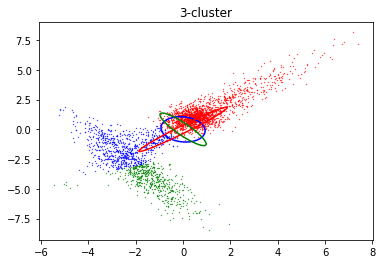

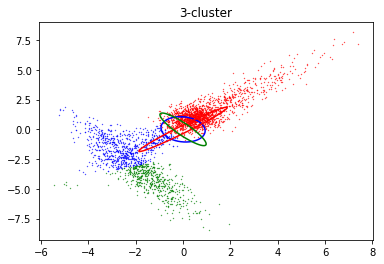

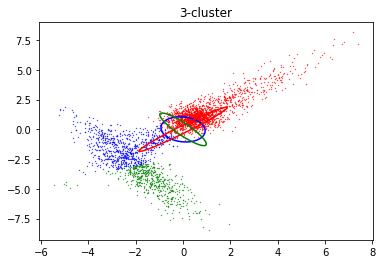

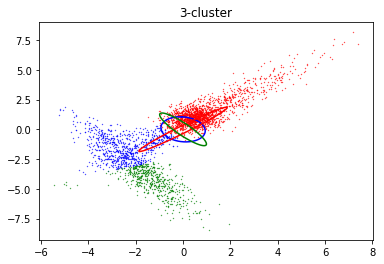

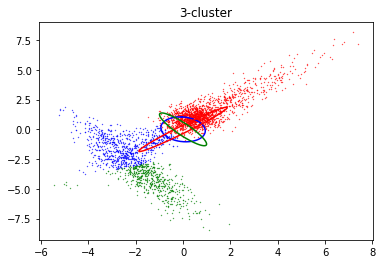

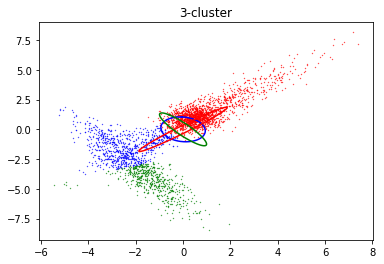

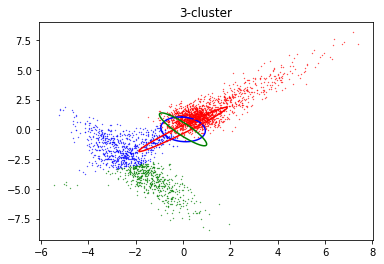

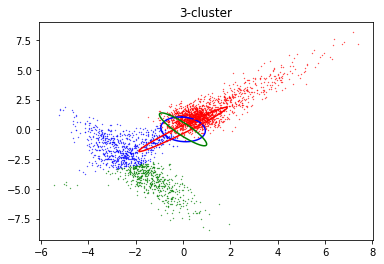

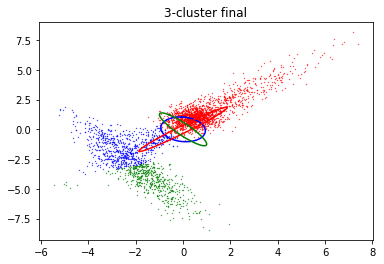

(array([[ 0.        , -2.76141025, -3.11299076],
       [ 1.        ,  4.00736258,  3.71590642],
       [ 1.        ,  2.49273928,  2.5063457 ],
       ...,
       [ 2.        , -0.59834098, -2.99436545],
       [ 0.        , -3.64272931,  0.79219991],
       [ 0.        , -2.10190378, -1.9862288 ]]), [array([ 0.        , -2.48647303, -1.44258206]), array([1.        , 0.91590867, 1.42931499]), array([ 2.        , -1.27726835, -4.44269045])])


In [38]:
print(my_kmeans(data, 3))

Eine Methode um Bilder zu komprimieren, ist es die Anzahl der Farben zu reduzieren. Um passende Farben zu finden und den einzelnen Pixeln neue Farben zuzuweisen, kann Clustering benutzt werden. Dafür wird jedes Bild als ein Datensatz aufgefasst, in dem die Pixel die einzelnen Datenpunkte sind. Jeder Datenpunkt besteht dabei aus drei Merkmalen (r, g, b).

In [40]:
path = 'resources/miemie.png'
image = mpimg.imread(path)

Hier haben wir unseres Beispielbild genommen, und schauen wir mal an die Size an.

In [41]:
print(image.shape)

(422, 422, 4)


Wir wandeln die Dateinen in passende Shape.

In [42]:
def format_image(img): 
    rows = img.shape[0]
    cols = img.shape[1]
    img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
    return img

newImage = format_image(image)
print(newImage.shape)

(178084, 4)


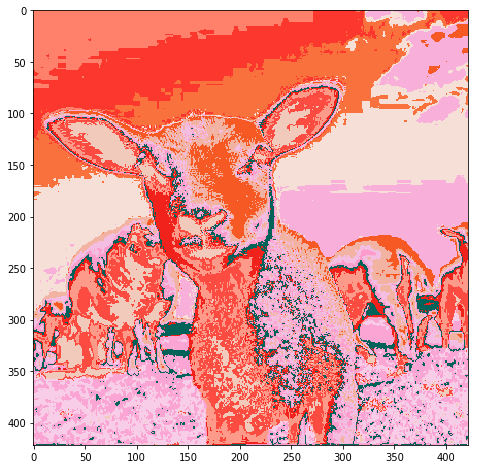

None


In [44]:
def format_array(img):
    rows = np.zeros((1, 4))
    img = np.concatenate((img, rows),axis=0)
    img = img.reshape(422, 422, 4)
    return img


def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

    
def kmeans(data, k):
    inizialCluster = get_inizial(data, k)
    middle = []
    mydata = clustering(data, k, data[inizialCluster])
    
    for i in range(0, k):  # iniziale Mittelpunkte
        middle.append(data[inizialCluster[i]])

    while True:
        kClasses = get_seperate_classes(mydata, k)
        middle_new = []
        for i in range(0, len(kClasses)):  # neue berechnete Mittelpunkte
            middle_new.append(diameter(kClasses[i]))

        if np.array_equal(middle, middle_new):
            break
        else:
            middle = middle_new
            mydata = clustering(mydata, k, middle)

    return mydata, middle
   
    
def get_compress(image):
    result = kmeans(image, 16)
    tmp = []
    for i in range(len(result[0])-1):
        tag = int(result[0][i][0])
        tmp.append((result[1][tag-1]))
    tmp = np.array(tmp)
    show_img(format_array(tmp))
    
print(get_compress(newImage))   

Und hier ist unserer kompimierte Schaf :)